In [58]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import copy

In [59]:
map = (150, 150)
nuc = [np.array([round(map[0]/2), round(map[1]/2)])]
free_zone = [[nuc[0][0] - np.array(round(map[0]/50)), nuc[0][1] - np.array(round(map[1]/50))], 
             [nuc[0][0] + np.array(round(map[0]/50)), nuc[0][1] + np.array(round(map[1]/50))]]
all_mol = []
all_pos = []

In [60]:
class Molecule:
    def __init__(self):
        self.pos = [self.spawn()]
        
    def spawn(self):
        global all_mol
        global free_zone
        while True:
            pos = np.array([round(map[0]/2), round(map[1]/2)])
            while free_zone[0][0] < pos[0] and pos[0] < free_zone[1][0] and free_zone[0][1] < pos[1] and pos[1] < free_zone[1][1]:
                pos = np.array([np.random.randint(0, map[0] + 1), np.random.randint(0, map[1] + 1)])
            if any([any([i.all() for i in pos == mol.pos]) for mol in all_mol]):
                continue
            if any([i.all() for i in pos == nuc]):
                continue
            return pos
        
    def cluster(self, index):
        i = 0
        while i < len(self.pos):
            self.merge_neighb(i, index)
            i += 1
        
    def merge_neighb(self, which_mol, index):
        global all_mol
        short_pos_list = [all_mol[i].pos for i in range(index + 1, len(all_mol))]
        neighb = [[(abs((self.pos[which_mol] - i)[0]) + abs((self.pos[which_mol] - i)[1])) == 1
                   for i in mol] for mol in short_pos_list]
        candidates = []
        for mol in range(0, len(neighb)):
            if any(neighb[mol]):
                candidates.append(mol + index + 1)
        candidates.reverse()
        for i in candidates:
            for j in all_mol[i].pos:
                self.pos.append(j)
            del all_mol[i]
            
    ####################################################################################
    
    def cluster_all(self, index):
        i = 0
        while i != len(self.pos):
            index += self.merge_neighb_all(i, index)
            i += 1
            
    def merge_neighb_all(self, which_mol, index):
        global all_mol
        short_pos_list = [all_mol[i].pos for i in range(0, len(all_mol)) if i != index]
        neighb = [[(abs((self.pos[which_mol] - i)[0]) + abs((self.pos[which_mol] - i)[1])) == 1
                   for i in mol] for mol in short_pos_list]
        candidates = []
        for mol in range(0, len(neighb)):
            if any(neighb[mol]):
                # der Kandidat kann vor dem Molekül sein, also nicht + 1
                if mol < index:
                    candidates.append(mol)
                else:
                    candidates.append(mol + 1)
        candidates.reverse()
        for i in candidates:
            [self.pos.append(j) for j in all_mol[i].pos]
        for i in candidates:
            del all_mol[i]
        counter = 0
        for i in candidates:
            if i <= index:
                counter -= 1
        return counter
        
    def move(self):
        global all_pos
        if np.random.rand() > 0.5:
            dir = np.array([0, np.random.choice([-1, 1])])
        else:
            dir = np.array([np.random.choice([-1, 1]), 0])
        pot_pos = copy.deepcopy(self.pos)
        for i in pot_pos:
            i += dir
        if sum([any([any([i.all() for i in pos == mol.pos]) for pos in pot_pos]) for mol in all_mol]) <= 1:
            self.pos = pot_pos
        

In [61]:
# nicht gleich, sondern next to
def merge_nucleus(nuc, all_mol):
    delete = []
    for mol in all_mol:
        out = False
        for pos_mol in mol.pos:
            for pos in nuc: 
                if (abs(pos[0] - pos_mol[0]) + abs(pos[1] - pos_mol[1])) == 1:
                    [nuc.append(i) for i in mol.pos]
                    delete.append(all_mol.index(mol))
                    out = True
                    break
            if out:
                break
    delete.reverse()
    for i in delete:
        del all_mol[i]

In [70]:
# Visualisiert die Moleküle
def plot():
    print(len(all_pos))
    plt.figure(figsize=(14, 14))
    plt.plot(*np.array([item for sublist in all_pos for item in sublist]).T, 'bs', *np.array(nuc).T, 'rs')
    #plt.scatter(*np.array([item for sublist in nuc for item in sublist]).T, marker = 's')
    plt.axis([-1, map[0]+1, -1, map[0]+1])
    plt.show()

In [63]:
def cluster(all_mol):
    i = 0
    while i < len(all_mol):
        all_mol[i].cluster(i)
        i += 1
        
def step(all_mol):
    i = 0
    while i < len(all_mol):
        all_mol[i].move()
        all_mol[i].cluster_all(i)
        i += 1

In [64]:
def pos_list(all_pos):
    all_pos.clear()
    for mol in all_mol:
        all_pos.append(mol.pos)

In [65]:
def clear_bound(all_mol):
    delete = []
    for mol in all_mol:
        for pos in mol.pos:
            if pos[0] < 0 or pos[0] > map[0] or pos[1] < 0 or pos[1] > map[1]:
                delete.append(all_mol.index(mol))
                break
    delete.reverse()
    for i in delete:
        for j in range(len(all_mol[i].pos)):
            new_mol = Molecule()
            all_mol.append(new_mol)
        del all_mol[i]

In [68]:
def too_big(all_mol):
    delete = []
    for mol in all_mol:
        if len(mol.pos) > 10:
            delete.append(all_mol.index(mol))
    delete.reverse()
    for i in delete:
        del all_mol[i]

1. spawn n molecules
2. cluster
3. step
4. merge nucleus
4. 3.

In [69]:
all_mol = []
nuc = [np.array([round(map[0]/2), round(map[1]/2)])]
'''
for i in range(200):
    new_mol = Molecule()
    all_mol.append(new_mol)
'''

'\nfor i in range(200):\n    new_mol = Molecule()\n    all_mol.append(new_mol)\n'

131


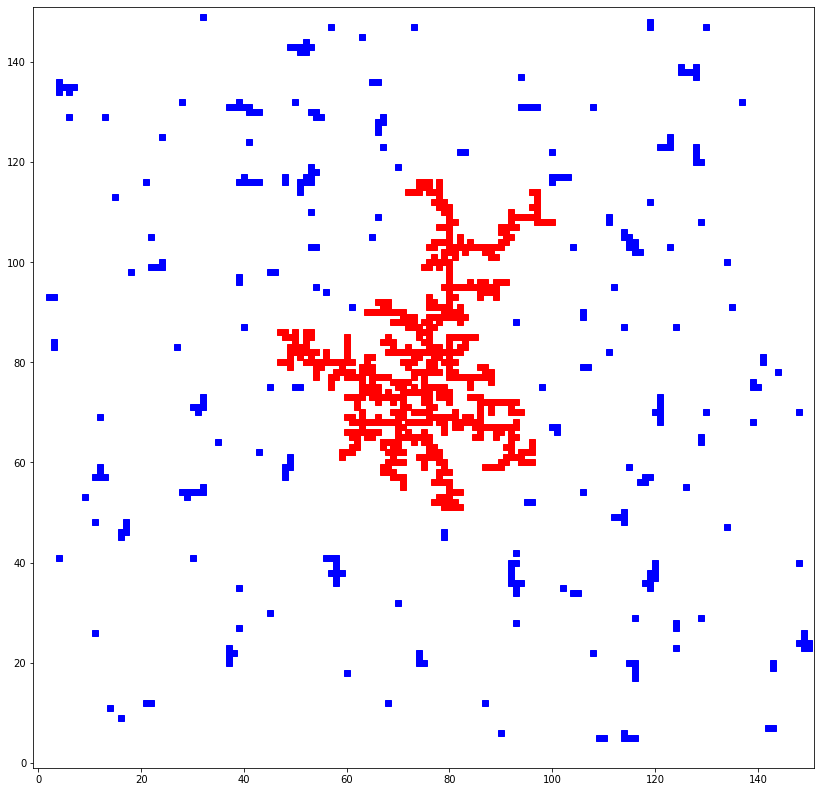

In [74]:
for i in range(50):
    for i in range(20):
        if len(all_mol) < 200:
            new_mol = Molecule()
            all_mol.append(new_mol)
        cluster(all_mol)
        step(all_mol)
        merge_nucleus(nuc, all_mol)

        clear_bound(all_mol)
        too_big(all_mol)
        
    clear_output(wait=True)
    pos_list(all_pos)
    plot()